In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set()

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/Concrete_Data_Yeh.csv')
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.shape

(1030, 9)

In [7]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [8]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [9]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [11]:
df.describe().corr().T

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,0.968003,0.943832,0.948489,0.897395,0.486244,0.695250,0.962242,0.914700
slag,0.968003,1.000000,0.988497,0.955964,0.951134,0.279225,0.514341,0.995982,0.960382
flyash,0.943832,0.988497,1.000000,0.976326,0.984750,0.237696,0.470106,0.982984,0.989267
water,0.948489,0.955964,0.976326,1.000000,0.980806,0.388075,0.595155,0.956880,0.986246
superplasticizer,0.897395,0.951134,0.984750,0.980806,1.000000,0.203789,0.427633,0.952125,0.999109
coarseaggregate,0.486244,0.279225,0.237696,0.388075,0.203789,1.000000,0.965461,0.279329,0.230821
fineaggregate,0.695250,0.514341,0.470106,0.595155,0.427633,0.965461,1.000000,0.514869,0.455458
age,0.962242,0.995982,0.982984,0.956880,0.952125,0.279329,0.514869,1.000000,0.960590
csMPa,0.914700,0.960382,0.989267,0.986246,0.999109,0.230821,0.455458,0.960590,1.000000


In [12]:
df.mean()

cement              281.167864
slag                 73.895825
flyash               54.188350
water               181.567282
superplasticizer      6.204660
coarseaggregate     972.918932
fineaggregate       773.580485
age                  45.662136
csMPa                35.817961
dtype: float64

In [13]:
df.min()

cement              102.00
slag                  0.00
flyash                0.00
water               121.80
superplasticizer      0.00
coarseaggregate     801.00
fineaggregate       594.00
age                   1.00
csMPa                 2.33
dtype: float64

In [14]:
df.max()

cement               540.0
slag                 359.4
flyash               200.1
water                247.0
superplasticizer      32.2
coarseaggregate     1145.0
fineaggregate        992.6
age                  365.0
csMPa                 82.6
dtype: float64

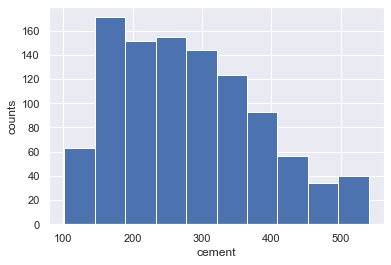

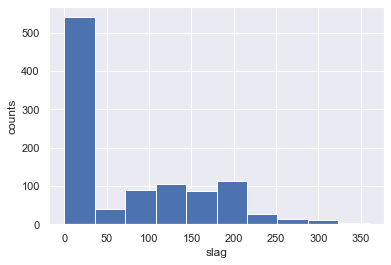

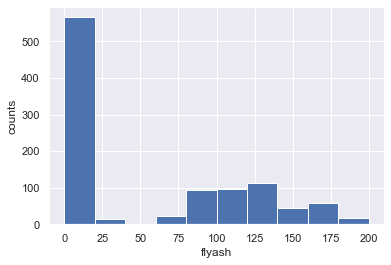

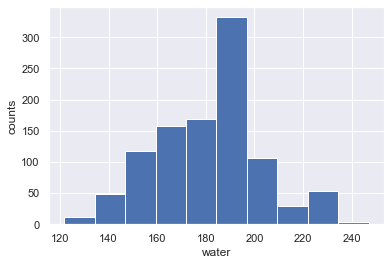

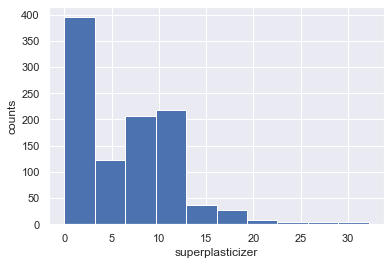

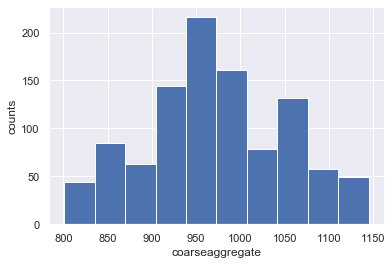

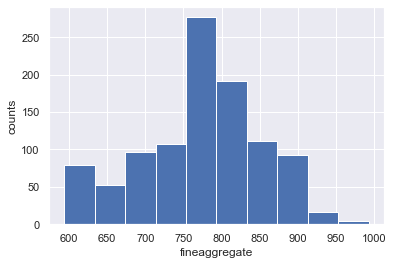

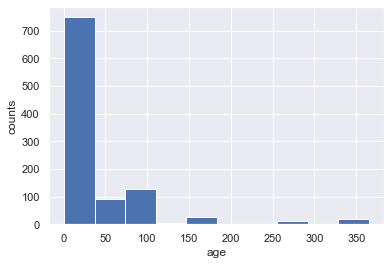

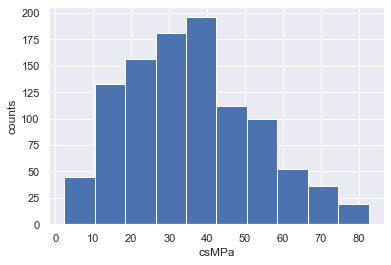

In [15]:
for i in df.columns:
    plt.hist(df[i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

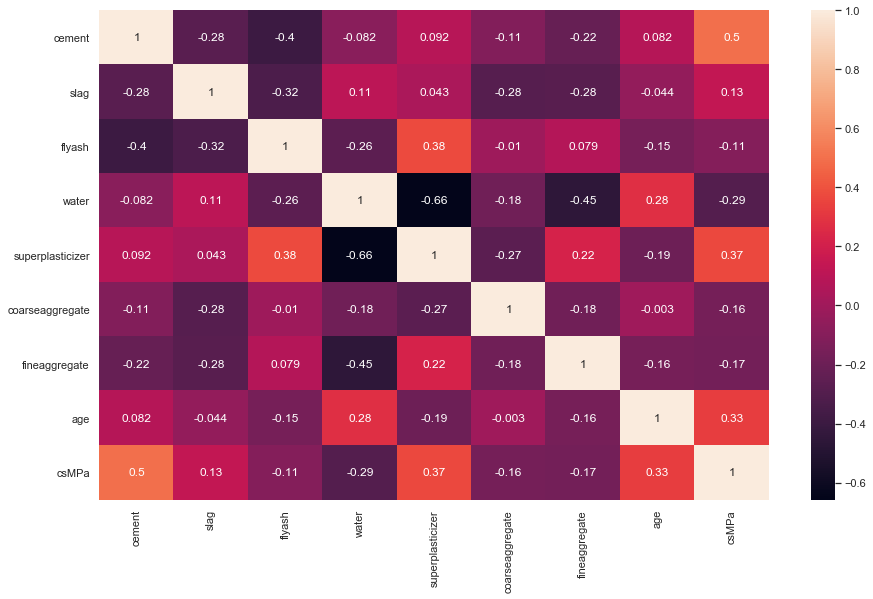

In [16]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

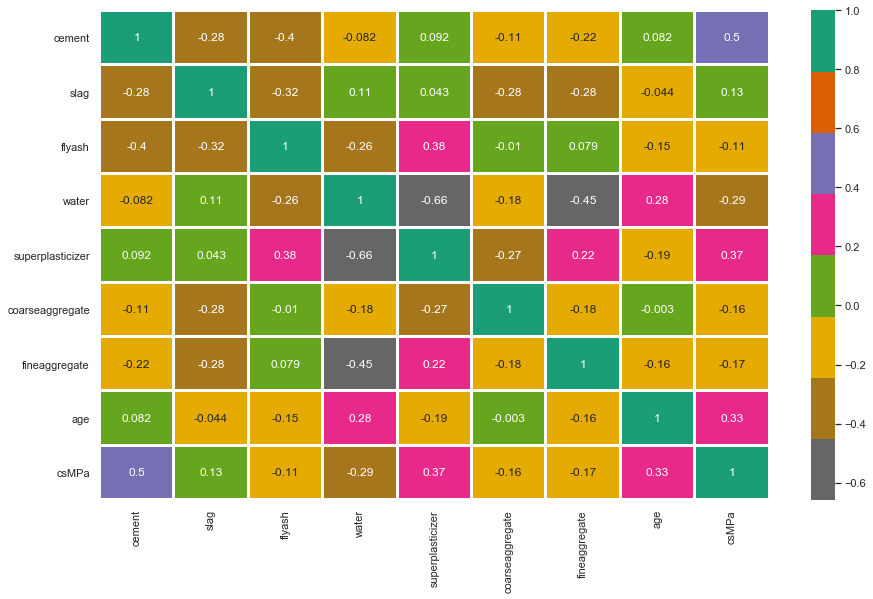

In [17]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

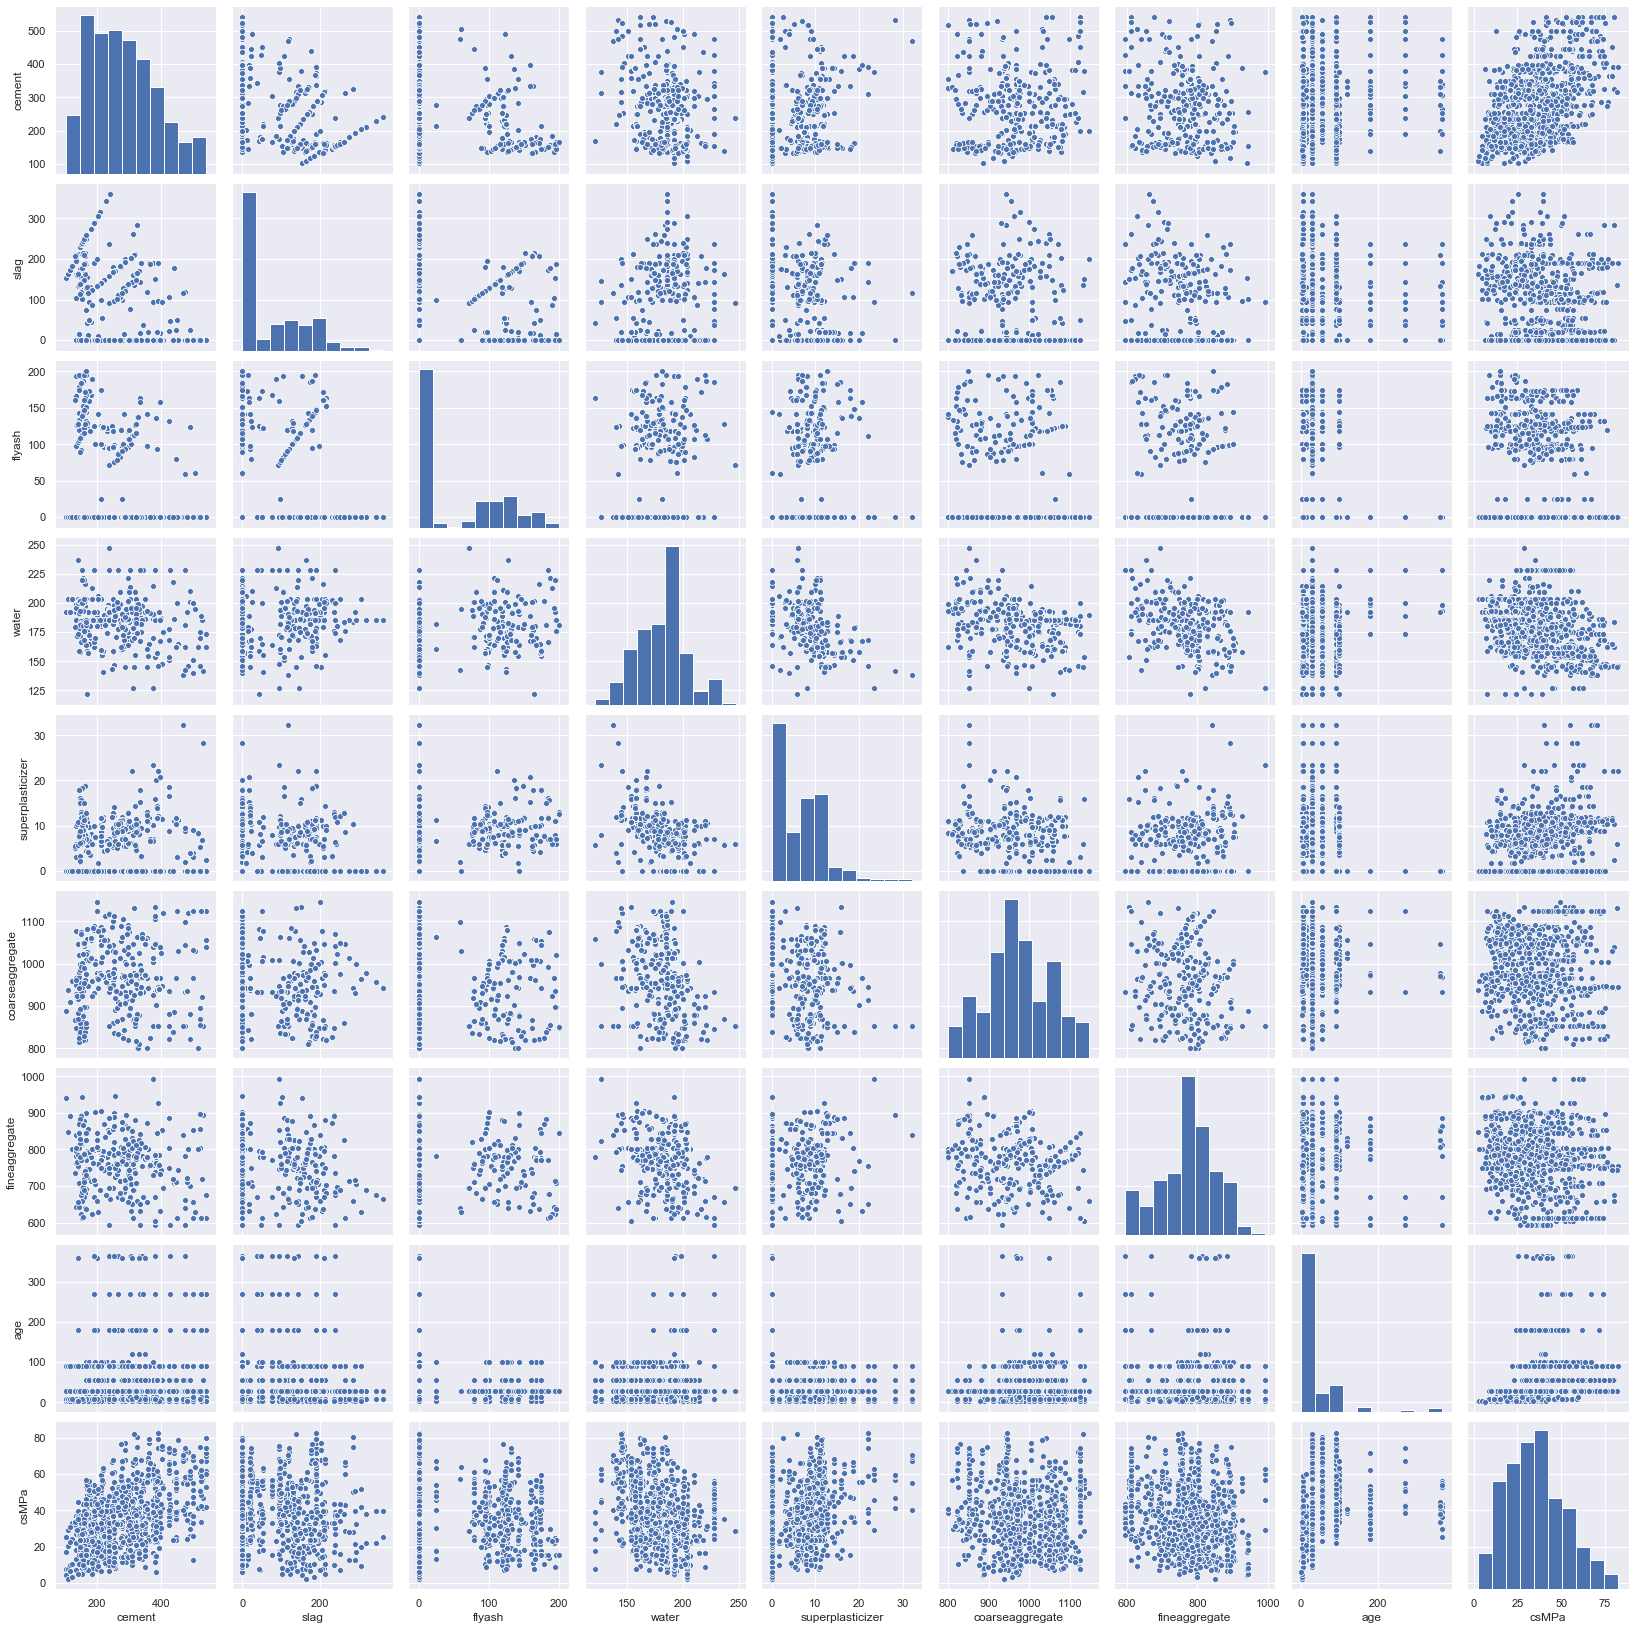

In [18]:
sns.pairplot(df)

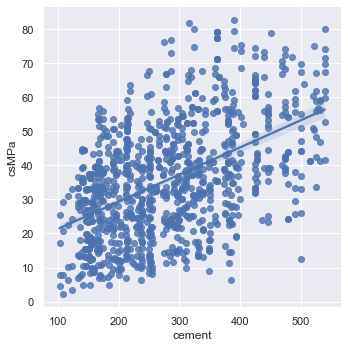

In [20]:
sns.lmplot(x='cement', y='csMPa',data=df)
plt.show()

In [21]:
df.head(2)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


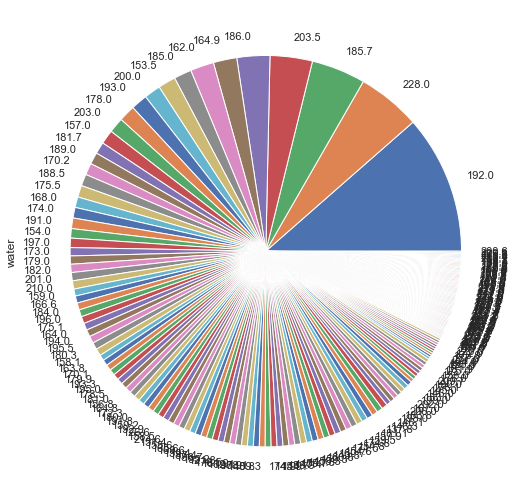

In [23]:
plt.figure(figsize = (15,9))
df.water.value_counts().plot(kind='pie')

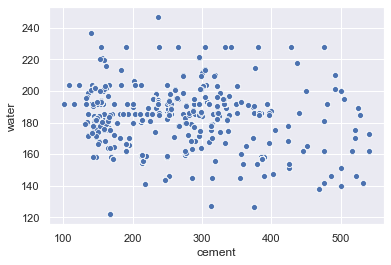

In [24]:
sns.scatterplot(x='cement',y='water',data=df)

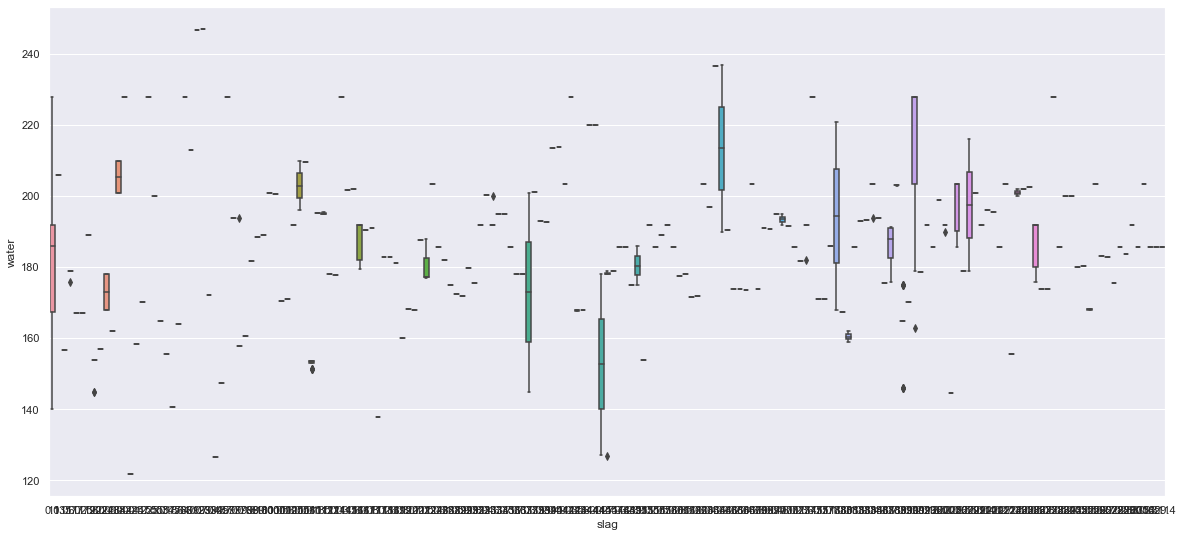

In [26]:
plt.figure(figsize=(20,9))
sns.boxplot(x='slag',y='water',data=df)

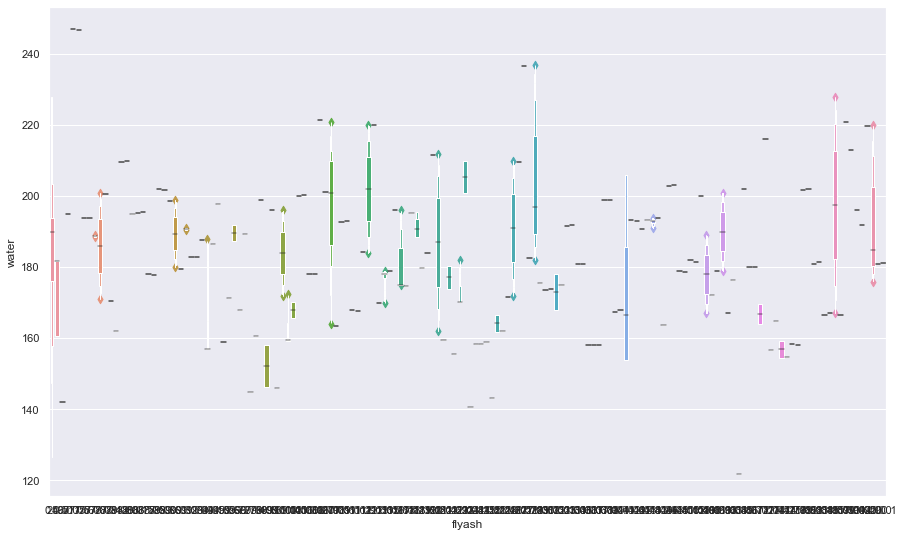

In [27]:
plt.figure(figsize=(15,9))
sns.boxenplot(x='flyash',y='water',data=df)

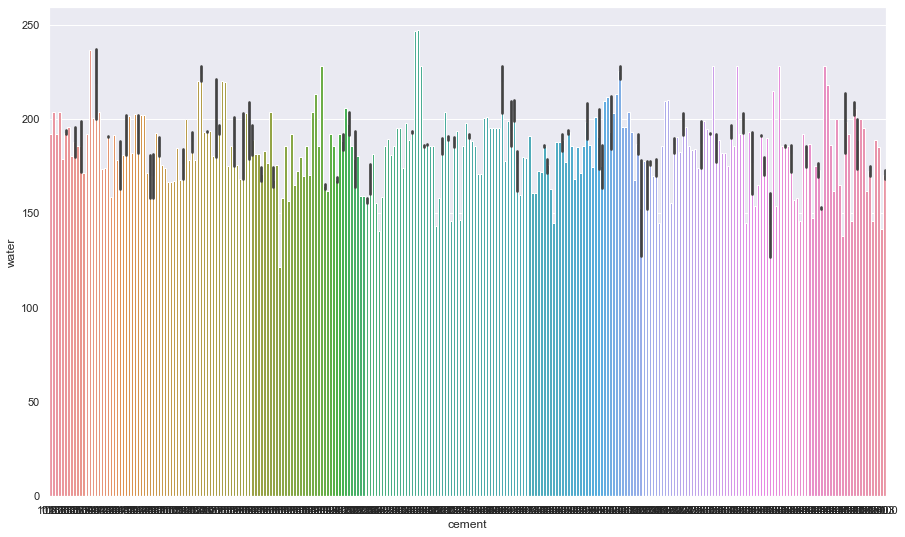

In [28]:
plt.figure(figsize=(15,9))
sns.barplot(x='cement',y='water',data=df)

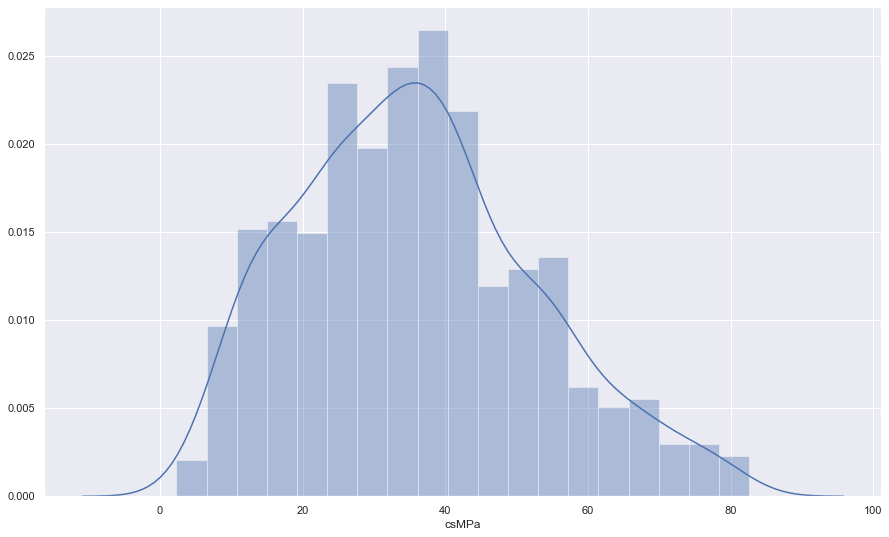

In [29]:
plt.figure(figsize=(15,9))
sns.distplot(df['csMPa'])

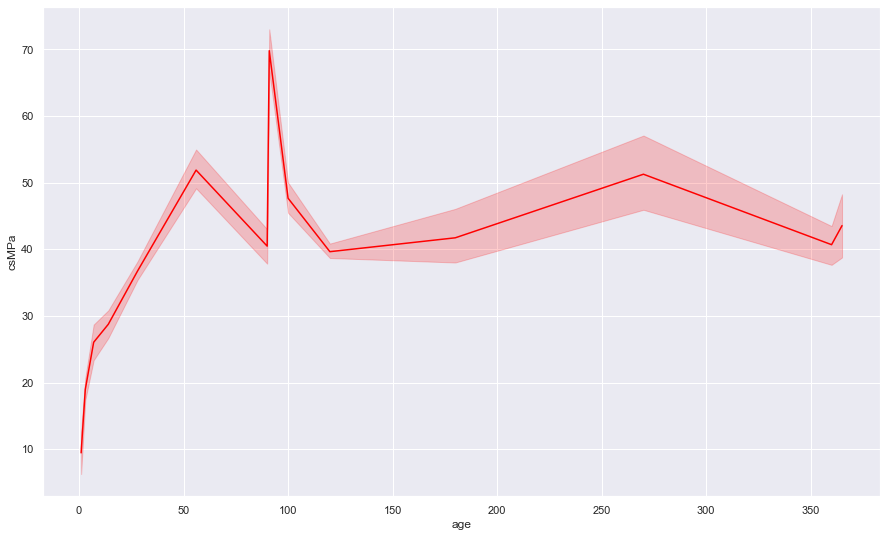

In [30]:
plt.figure(figsize=(15,9))
sns.lineplot(x='age',y='csMPa',data=df,color='red')

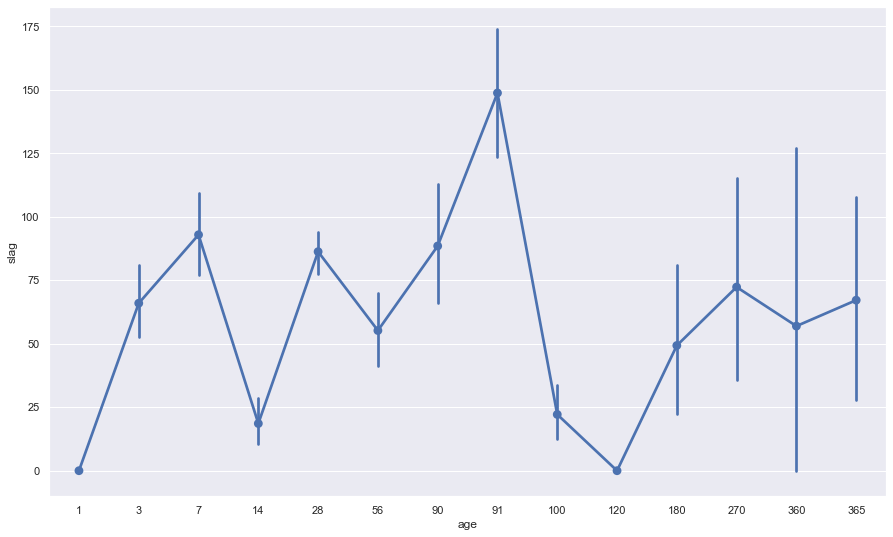

In [31]:
plt.figure(figsize=(15,9))
sns.pointplot(x='age',y='slag',data=df)

<Figure size 1080x648 with 0 Axes>

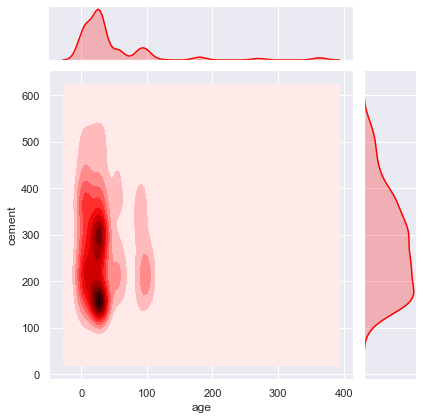

In [32]:
plt.figure(figsize=(15,9))
sns.jointplot(x='age',y='cement',data=df,kind='kde',color='red')

In [33]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

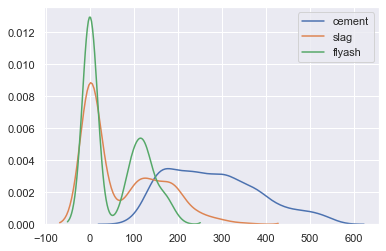

In [34]:
sns.kdeplot(df['cement'])
sns.kdeplot(df['slag'])
sns.kdeplot(df['flyash'])

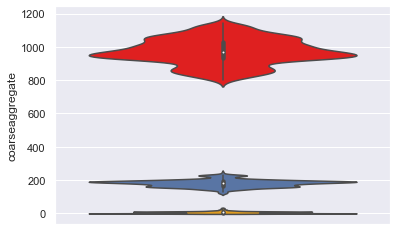

In [35]:
sns.violinplot(y="water",data=df)
sns.violinplot(y="superplasticizer",data=df,color='orange')
sns.violinplot(y="coarseaggregate",data=df,color='red')

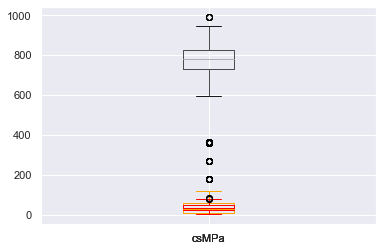

In [36]:
df.boxplot(column="fineaggregate")
df.boxplot(column="age",color='orange')
df.boxplot(column="csMPa",color='red')

In [37]:
import sweetviz as sv

In [38]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
from IPython.display import IFrame

In [40]:
IFrame(src='Analyze.html',width=1000,height=600)

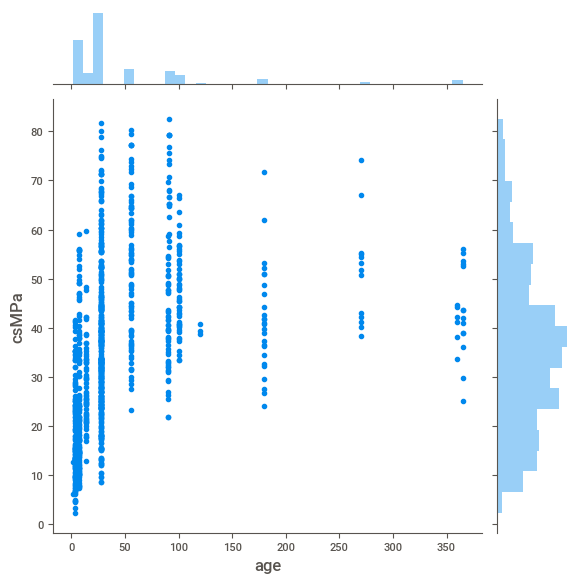

In [41]:
sns.jointplot(x="age",y="csMPa",data=df)

In [42]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [43]:
x=df.drop(['csMPa'],axis='columns')

In [44]:
y=df.csMPa.values

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [50]:
#make a copy of features matrix for mutual information analysis
X_mi = x.copy()

#label encoding for categorical variables
for colname in X_mi.select_dtypes("object"):
    X_mi[colname], _ = X_mi[colname].factorize()

#all discrete features have int dtypes
discrete_features = X_mi.dtypes == object


In [51]:
#some continuous variables also have int dtypes
discrete_features[X_mi.columns] = False

In [52]:
#use regression since the target variable is continuous
from sklearn.feature_selection import mutual_info_regression

#define a function to produce mutual information scores
def make_mi_scores(X_mi, y, discrete_features):
    mi_scores = mutual_info_regression(X_mi, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X_mi.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

#compute mutual information scores
mi_scores = make_mi_scores(X_mi, y, discrete_features)
mi_scores


age                 0.361563
water               0.356314
cement              0.306050
coarseaggregate     0.249727
fineaggregate       0.215339
superplasticizer    0.209698
slag                0.176590
flyash              0.123007
Name: MI Scores, dtype: float64

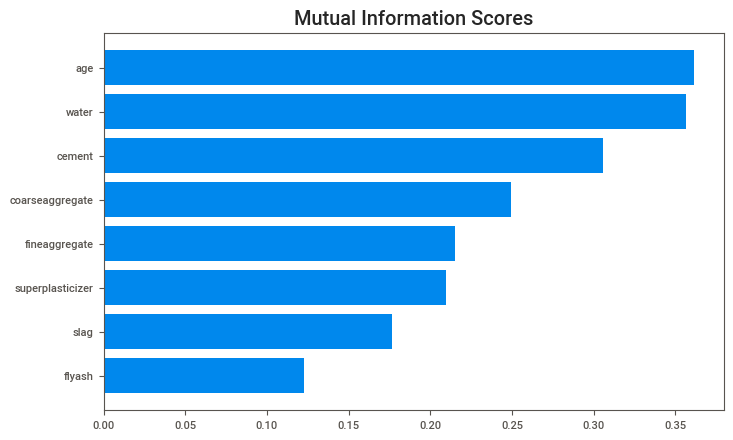

In [53]:
#define a function to plot mutual information scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

#plot the scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

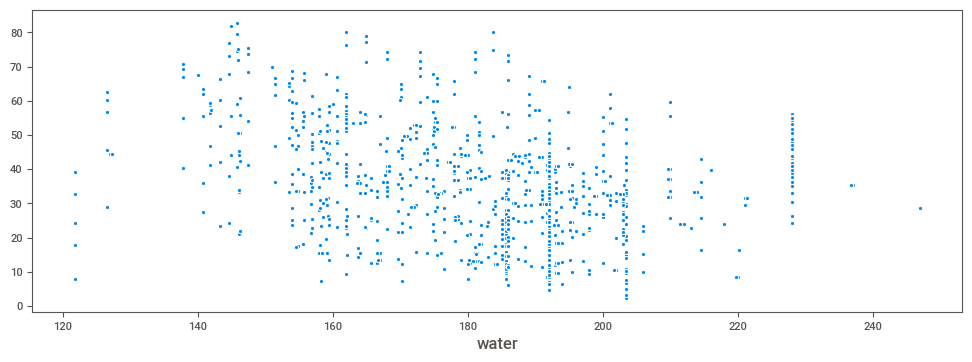

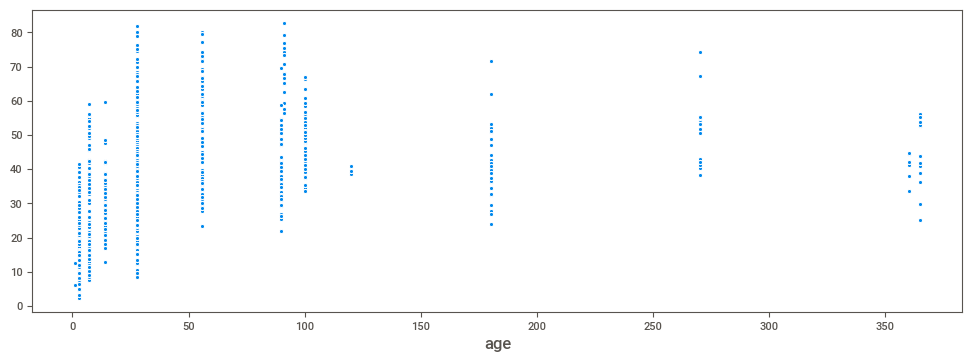

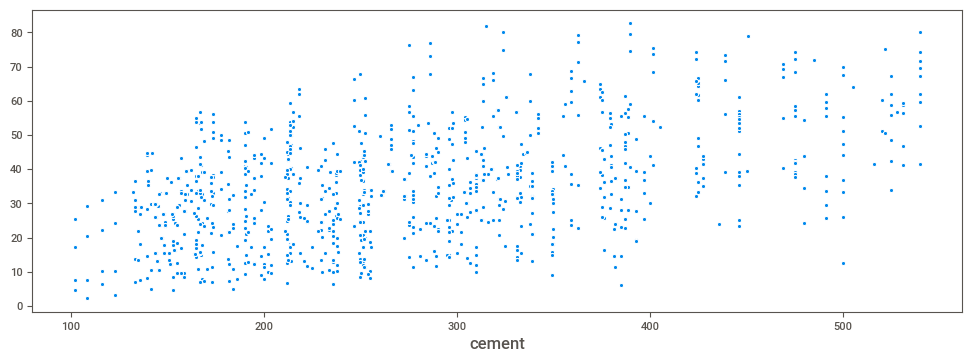

In [54]:
#plot top MI score predictors against target
for i in ['water', 'age', 'cement']:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.scatterplot(x=X_mi[i], y=y, ax=ax)
    plt.show()

In [56]:
#copy features matrix for principal component analysis
X_for_PCA = x.copy()

#standardize
X_for_PCA_scaled = (X_for_PCA - X_for_PCA.mean(axis=0)) / X_for_PCA.std(axis=0)

from sklearn.decomposition import PCA

#create principal components
pca = PCA(len(x.columns))
X_pca = pca.fit_transform(X_for_PCA_scaled)

#convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

In [59]:
#determine loadings
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=x.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
cement,0.098401,-0.113737,0.814202,-0.054297,0.148206,-0.203142,0.221844,0.446163
slag,0.177262,0.686053,-0.171794,-0.362699,-0.020932,0.304882,0.228363,0.437384
flyash,-0.394662,-0.142948,-0.408221,0.226751,0.549631,-0.183267,0.352463,0.381886
water,0.547004,0.053256,-0.213190,0.296060,0.070222,-0.365970,-0.524275,0.388741
superplasticizer,-0.505945,0.282930,0.234597,-0.037274,0.354618,0.193294,-0.664643,0.051750
coarseaggregate,0.037928,-0.629943,-0.174088,-0.545805,-0.033083,0.314559,-0.226840,0.349320
fineaggregate,-0.401926,-0.019391,-0.004569,0.385282,-0.701237,0.092466,-0.039026,0.433370
age,0.291479,-0.125981,0.100521,0.527919,0.228010,0.743908,0.069367,0.012881


In [61]:
#generate OLS regression results for all features
import statsmodels.api as sm

X_sm = sm.add_constant(x)
model = sm.OLS(y,X_sm)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 20 Oct 2021   Prob (F-statistic):          6.29e-206
Time:                        08:50:33   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -23.3312     26.586  

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
#initialize VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
#calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

            feature        VIF
0            cement  15.456717
1              slag   3.329127
2            flyash   4.147833
3             water  82.157569
4  superplasticizer   5.471094
5   coarseaggregate  84.955779
6     fineaggregate  72.790995
7               age   1.699459


In [65]:
#print OLS summary for each feature
for i in x.columns:
    X_sm = sm.add_constant(x[i])
    model = sm.OLS(y,X_sm)
    print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     338.7
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.32e-65
Time:                        08:51:38   Log-Likelihood:                -4214.6
No. Observations:                1030   AIC:                             8433.
Df Residuals:                    1028   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4425      1.297     10.365      0.0

In [67]:
li=LinearRegression()
li.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
li.score(xtest,ytest)*100

64.1330178584545

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rnd=RandomForestRegressor()
rnd.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [76]:
rnd.score(xtest,ytest)*100

91.06094177527521

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [79]:
gnd=GradientBoostingRegressor()
gnd.fit(xtrain,ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
gnd.score(xtest,ytest)*100

89.66064694430635